# Binary Prediction of Smoker Status using Bio-Signals

## Overview:
This notebook analyses the 'Binary Prediction of Smoker Status using Bio-Signals' dataset from the Kaggle Plagounded Series - Season 3, Episode 24. Link below.

https://www.kaggle.com/competitions/playground-series-s3e24/overview

### Data:

*Dataset Description*
- id: unique id
- age : 5-years gap
- height(cm)
- weight(kg)
- waist(cm) : Waist circumference length
- eyesight(left)
- eyesight(right)
- hearing(left)
- hearing(right)
- systolic : Blood pressure
- relaxation : Blood pressure
- fasting blood sugar
- Cholesterol : total
- triglyceride
- HDL : cholesterol type
- LDL : cholesterol type
- hemoglobin
- Urine protein
- serum creatinine
- AST : glutamic oxaloacetic transaminase type
- ALT : glutamic oxaloacetic transaminase type
- Gtp : γ-GTP
- dental caries
- smoking: Target Variable

*Files*

https://www.kaggle.com/competitions/playground-series-s3e24/data

* train.csv - the training dataset; smoking is the binary target
* test.csv - the test dataset; your objective is to predict the probability of positive smoking

The original data was also open for experimentation, the data matches the format but excludes id.

https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction-using-biosignals

* original_train.csv - the training dataset; smoking is the binary target
* original_test.csv - the test dataset; your objective is to predict the probability of positive smoking


### Aim:
Use binary classification to predict a patient's smoking status given information about various other health indicators.

### Evaluation:
Submissions are evaluated on 'area under the ROC curve' between the predicted probability and the observed target.

### Outcome:
Our final model's predictions finished with a score of 0.87583, which placed 283 out of 1910 submissions.


## Structure:

### 1. Imports

#### Packages
* Essentials
* Scikit-Learn Tools
* Scikit-Learn Models
* Other Models
* Neural Network

#### Data
* Train & Test
* Original Train & Test

### 2. Functions
* Baseline Model Results
* Create Results Submision

### 3. Data

#### Exploratory Data Analysis
* Feature Analysis
* Categorical Features

#### Feature Engineering

### 4. Model Training
* Baseline Model Training & Comparison
* RandomizedSearchCV & GridSearchCV
* Manual Fine-tuning

### 5. Ensemble Training
This notebook will train a variety of Scikit-learn's classification models to determine which has the best area under the ROC curve between the predicted probability and the observed target.

After determining the best 1 or 2 models we will then dive in further with a RandomizedSearchCV and GridSearchCv to optimise the model's hyperparameters.

# 1. Imports

## Packages

In [10]:
# Essentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Scikit-Learn Tools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# Scikit-Learn Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Other Models

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Neural Network

from sklearn.ensemble import StackingClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Extras

import warnings

# Filter out FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data

In [11]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
orig_train = pd.read_csv('data/original_train.csv')
orig_test = pd.read_csv('data/original_test.csv')
df = pd.concat([train, orig_train], ignore_index=True)


# 2. Functions

## Baseline Model

In [12]:
def baseline_model_results(model):
    '''
    Fits a model to the training data and makes predictions on the validation data.
    Then prints a classification report and ROC AUC score based on the results. 
    '''
    
    model.fit(X_train, y_train)
    y_preds = model.predict(X_valid)
    print(classification_report(y_valid, y_preds))
    print(f'ROC AUC Score: {roc_auc_score(y_valid, y_preds)}')
    print('\n')

## Create Submission

In [13]:
def create_results_submission(model):
    '''
    Fits a completed model to the total training data and makes prediction on the test data.
    Then prints the results head and save the results to a csv data file in the preferred format.
    Finally it returns the results.
    '''
    
    model.fit(X,y)
    model_preds = model.predict_proba(test)[:,1]
    results = pd.DataFrame([test['id'],model_preds]).transpose()
    results.columns = [['id','smoking']]
    results['id'] = results['id'].astype('int')
    print(results.head())
    # Get the current timestamp
    current_time = datetime.now()

    # Format the timestamp as 'day-hour-minute'
    timestamp = current_time.strftime("%d-%H-%M")

    # Create the filename
    filename = 'results-' + timestamp + '.csv'
    results.to_csv(filename,index=False)

    return results

# 3. Exploratory Data Analysis

In [14]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0.0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1.0,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2.0,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3.0,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4.0,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198240 entries, 0 to 198239
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  float64
 1   age                  198240 non-null  int64  
 2   height(cm)           198240 non-null  int64  
 3   weight(kg)           198240 non-null  int64  
 4   waist(cm)            198240 non-null  float64
 5   eyesight(left)       198240 non-null  float64
 6   eyesight(right)      198240 non-null  float64
 7   hearing(left)        198240 non-null  int64  
 8   hearing(right)       198240 non-null  int64  
 9   systolic             198240 non-null  int64  
 10  relaxation           198240 non-null  int64  
 11  fasting blood sugar  198240 non-null  int64  
 12  Cholesterol          198240 non-null  int64  
 13  triglyceride         198240 non-null  int64  
 14  HDL                  198240 non-null  int64  
 15  LDL              

In [16]:
# We can drop the id column
df.drop('id',axis=1,inplace=True)

**Summary**

* No null values to fill
* All features in numerical form

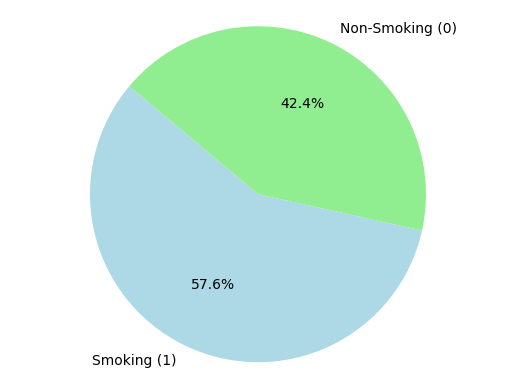

In [17]:
# Check Target Variable Totals
smoking_totals = df['smoking'].value_counts()

# Labels for the pie chart
labels = ['Smoking (1)', 'Non-Smoking (0)']
# Colors for each category
colors = ['lightblue', 'lightgreen']
# Creating the pie chart
plt.pie(smoking_totals, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

We have a fairly balanced target variable.

## Correlation

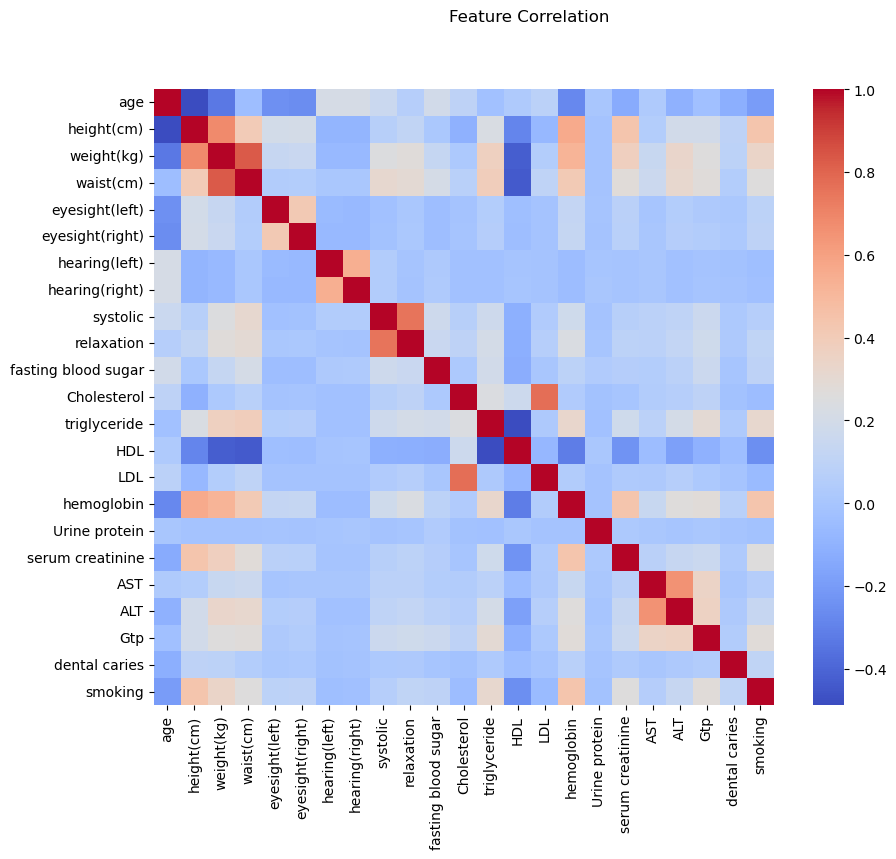

In [18]:
plt.figure(figsize=(10,8))
plt.suptitle('Feature Correlation')
sns.heatmap(df.corr(),cmap='coolwarm');

**Highest correlations all intuitive**
* Waist vs Weight
* Cholesterol vs LDL (cholesterol type)
* systolic (Blood pressure) vs relaxation (Blood pressure)

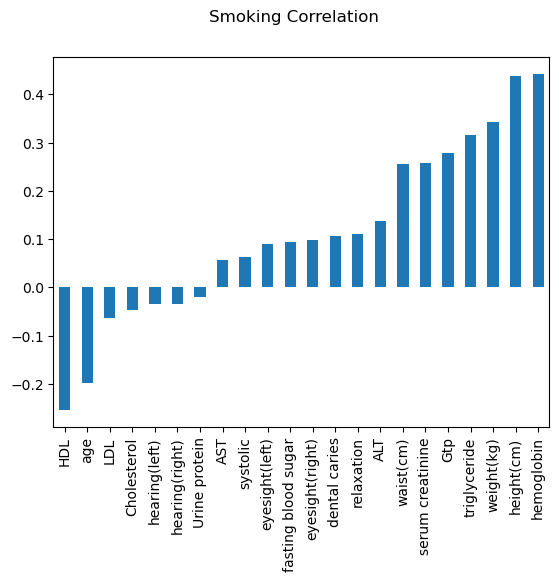

In [19]:
plt.suptitle('Smoking Correlation')
df.corr()['smoking'].sort_values().drop('smoking').plot(kind='bar');

**Highest Positive Correlation**
* Hemogoblin
* Height
* Weight
* Triglyceride

**Highest Negative Correlation**
* HDL
* Age

In [20]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,...,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000,198240.000000
mean,44.271418,165.153375,66.906709,82.817163,1.007599,1.002519,1.024248,1.023966,122.301488,76.701085,...,56.135951,114.700858,14.763003,1.076650,0.891440,25.650847,26.667282,36.941455,0.201226,0.423583
std,11.886308,8.895587,12.656868,9.039363,0.422827,0.414241,0.153820,0.152943,12.920634,9.135720,...,14.106668,31.601535,1.460424,0.359204,0.188198,12.014495,21.119268,35.637177,0.400917,0.494127
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,77.000000,0.800000,0.800000,1.000000,1.000000,113.000000,70.000000,...,46.000000,94.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,77.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,23.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,65.000000,134.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


**Points to explore**
* Eyesight(left) & (right), serum creatinine, HDL, LDL, AST, ALT all have maximum with huge separation from their means.

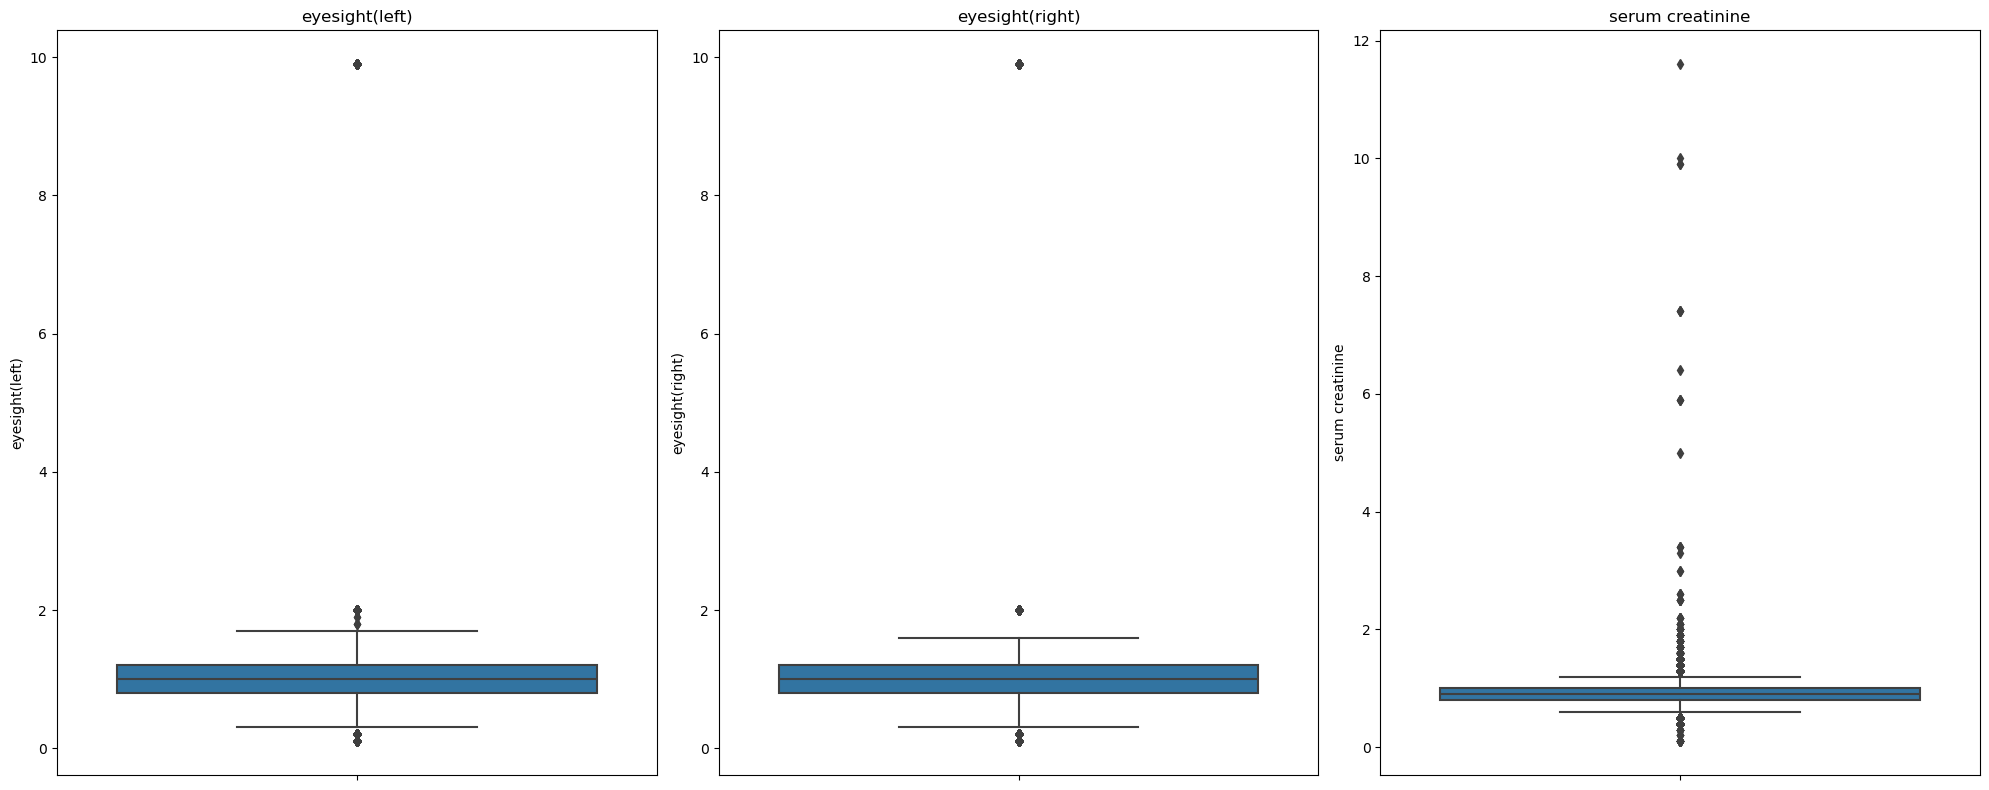

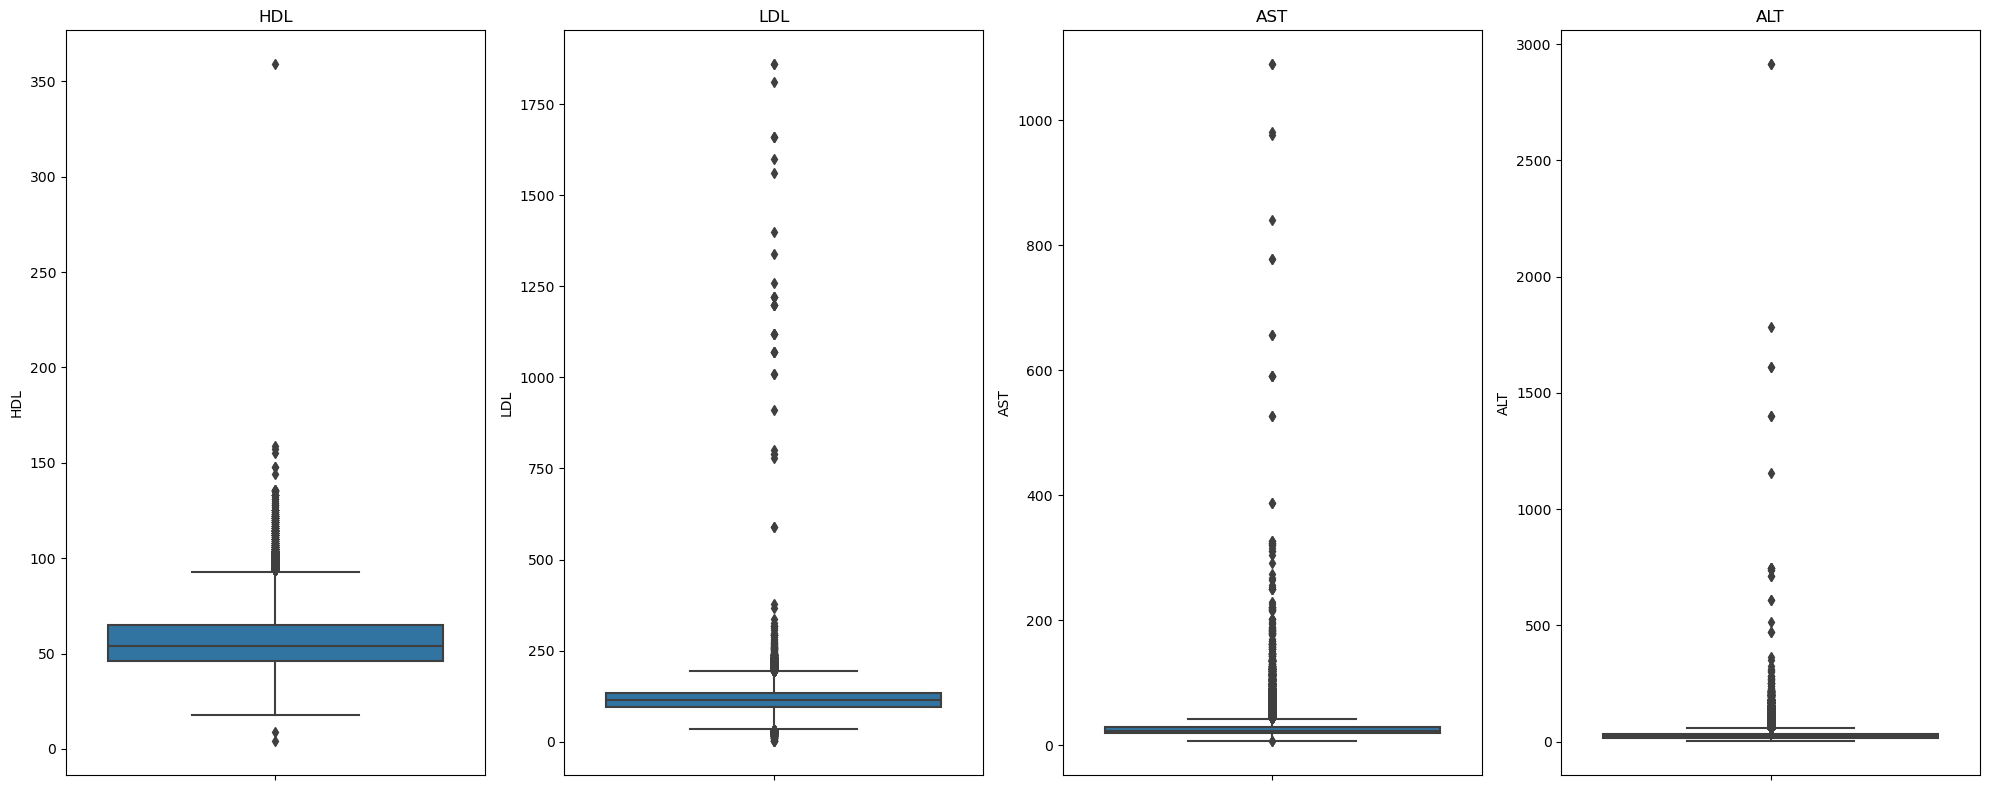

In [21]:
# List of features to plot
features_to_plot = ['eyesight(left)','eyesight(right)','serum creatinine']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

for i, feature in enumerate(features_to_plot):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

# List of features to plot
features_to_plot = ['HDL', 'LDL', 'AST', 'ALT']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8))

for i, feature in enumerate(features_to_plot):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

*Potential Outliers*

* We have really condensed distributions across all 7 feature here.
* eyesight(left), eyesight(right), & HDL all have very distinct outliers
* Let's inspect these further.

### Eyesight

In [115]:
df[df['eyesight(left)'] > 9]

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
413,70,155,60,84.0,9.9,1.0,1,1,144,71,...,44,160,13.2,1,0.7,20,13,23,0,0
741,55,170,70,84.0,9.9,1.0,1,1,112,70,...,73,71,14.5,1,0.8,21,17,12,0,0
1117,70,155,65,93.0,9.9,0.1,1,1,131,72,...,46,59,15.9,1,0.6,22,23,49,0,0
1872,60,165,60,75.0,9.9,0.6,1,1,118,70,...,41,133,15.5,1,1.2,24,23,31,1,0
2733,50,170,75,82.0,9.9,0.9,1,1,127,68,...,53,68,16.6,1,0.8,23,37,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195152,50,175,95,101.2,9.9,0.7,1,1,124,88,...,43,68,16.6,1,1.0,25,27,64,0,0
195281,30,170,80,87.0,9.9,1.5,1,1,119,67,...,59,123,15.2,1,1.2,23,22,12,0,0
195687,80,145,55,97.5,9.9,0.6,1,1,146,69,...,65,128,13.5,1,0.8,21,11,17,0,0
196464,40,175,90,96.0,9.9,1.5,1,1,158,96,...,51,187,17.0,1,1.2,41,52,74,0,0


In [116]:
print(df[df['eyesight(left)'] == 9.9]['smoking'].value_counts())
print(df[df['eyesight(right)'] == 9.9]['smoking'].value_counts())

smoking
0    137
1     65
Name: count, dtype: int64
smoking
0    129
1     56
Name: count, dtype: int64


In [117]:
df['eyesight(left)'].value_counts()

eyesight(left)
1.0    45995
1.2    45498
1.5    27074
0.9    18803
0.8    18672
0.7    16240
0.6     8546
0.5     7071
0.4     4197
0.3     2844
0.2     1237
0.1      958
2.0      843
9.9      202
1.6       33
1.3       18
1.1        3
1.8        3
1.9        2
1.7        1
Name: count, dtype: int64

Further inspection shows that eyesight is judged on a range from 0 to 2, with 9.9 a specific grouping for blindness. See below

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9323841/

> "Visual acuity variables for the right and left eyes were expressed as decimal visual acuity ranging from 0.1 to 2.0; values of 9.9 (as a nominal value) for blindness."

So accordingly, we can choose to feature engineer a binary column for left and right to indicate blindess. We should also adjust the 9.9 to more appropriate values. After research we find that 2 is in fact used for higher scoring visual acuity, 1 is average, and lower than 1 below average accordingly.

https://www.easee.online/en/help-center/easee-test-en/how-do-i-read-my-visual-acuity-results/#:~:text=In%20this%20system%2C%201.0%20or,person%20sees%20at%20that%20distance.

> "In this system, 1.0 or 100% means the average vision, 2.0 or 200 % is the highest possible value and indicates very sharp, way above-average vision"

Therefore, we will convert the 9.9 to a 0, to better reflect the linear progression of the score, while also creating a new feature to indicate blindness for each eye.

In [118]:
# Create feature column for blindness and adjust their eyesight values to 0

df['blind(left)'] = df['eyesight(left)'].apply(lambda x: 1 if x == 9.9 else 0)
df['blind(right)'] = df['eyesight(right)'].apply(lambda x: 1 if x == 9.9 else 0)
df['eyesight(left)'] = df['eyesight(left)'].apply(lambda x: 0.0 if x == 9.9 else x)
df['eyesight(right)'] = df['eyesight(right)'].apply(lambda x: 0.0 if x == 9.9 else x)

### HDL

In [119]:
df[df['HDL'] > 300]

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,blind(left),blind(right)
191697,35,175,80,88.0,0.8,1.5,1,1,120,80,...,15.6,1,0.9,18,19,24,0,0,0,0


There is only one sample with HDL great than 300. Let's find the max otherwise.

In [120]:
df[df['HDL'] < 300]['HDL'].max()

159

Max otherwise is 150.

In [121]:
df[df['HDL'] > 130]['HDL']

3878      133
18080     135
24829     136
52326     133
55215     135
90501     133
123976    133
161772    135
162099    136
163877    144
169344    132
169689    148
176542    133
178512    136
179336    159
181906    131
182191    148
186332    133
187248    157
188629    133
188930    155
190106    133
191697    359
197505    135
198125    131
Name: HDL, dtype: int64

This range seems to be more consistent so let's drop the outlier.

In [122]:
# Drop HDL outlier.

df = df[df['HDL'] < 300]

### ALT

In [123]:
df[df['ALT'] > 2500]

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,blind(left),blind(right)
13787,60,170,80,91.0,1.0,1.0,2,2,117,70,...,14.1,1,1.4,31,2914,2,0,1,0,0
196920,60,170,70,91.5,1.2,1.2,2,2,117,67,...,14.1,1,1.4,31,2914,2,0,0,0,0


In [124]:
df[df['ALT'] < 2500]['ALT'].max()

1783

These 2 samples at 2914 do seem to be on the extreme end with the next most being 1783, so let's also drop these.

In [125]:
# Drop ALT outliers.

df = df[df['ALT'] < 2500]

### Categorical

In [126]:
pd.DataFrame(df.nunique())

,0
age,18
height(cm),15
weight(kg),29
waist(cm),548
eyesight(left),20
eyesight(right),18
hearing(left),2
hearing(right),2
systolic,128
relaxation,94


**Potential categorical features**

* hearing(left),hearing(right),urine protein, & dental caries

In [127]:
# Check unqiue value for each

for feature in ['hearing(left)','hearing(right)','Urine protein','dental caries']:
    print(feature,df[feature].unique())

hearing(left) [1 2]
hearing(right) [1 2]
Urine protein [1 3 2 4 5 6]
dental caries [0 1]


Dental caries is already in binary form, but the other 3 features can be one hot encoded.

In [128]:
# Make dummies for hearing(left), hearing(right) and dental caries

df = pd.get_dummies(df,columns=['hearing(left)','hearing(right)','Urine protein'],drop_first=True)

## Train & Validation Split

In [129]:
X = df.drop('smoking',axis=1)
y = df['smoking']

In [130]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=50)

## Adjust Test Data with Same Changes

In [131]:
# Create feature column for blindness and adjust their eyesight values to 0

test['blind(left)'] = test['eyesight(left)'].apply(lambda x: 1 if x == 9.9 else 0)
test['blind(right)'] = test['eyesight(right)'].apply(lambda x: 1 if x == 9.9 else 0)
test['eyesight(left)'] = test['eyesight(left)'].apply(lambda x: 0.0 if x == 9.9 else x)
test['eyesight(right)'] = test['eyesight(right)'].apply(lambda x: 0.0 if x == 9.9 else x)

In [132]:
# Make dummies for hearing(left), hearing(right) and dental caries

test = pd.get_dummies(test,columns=['hearing(left)','hearing(right)','Urine protein'],drop_first=True)

In [133]:
# Check test has same columns

df.drop('smoking',axis=1).columns == test.drop('id',axis=1).columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# 4. Model Training

## Model Baseline Fits

We will create a function to fit and predict our dateset with multiple classification models:

* Logistic Regression
* Support Vector Machines
* Decision Trees
* Random Forest
* Naive Bayes
* K-Nearest Neighbors

In [134]:
models = {}

models['Logistic Regression'] = LogisticRegression(max_iter=1000)
models['Support Vector Machines'] = LinearSVC()
models['Decision Trees'] = DecisionTreeClassifier()
models['Random Forest'] = RandomForestClassifier()
models['Naive Bayes'] = GaussianNB()

In [97]:
for key in models.keys():
    print(key)
    baseline_model_results(models[key])

Logistic Regression


C:\Users\tophe\.conda\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.77      0.77      0.77     34283
           1       0.69      0.69      0.69     25189

    accuracy                           0.74     59472
   macro avg       0.73      0.73      0.73     59472
weighted avg       0.74      0.74      0.74     59472

ROC AUC Score: 0.7308349363020563


Support Vector Machines


C:\Users\tophe\.conda\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.66      0.89      0.76     34283
           1       0.72      0.37      0.49     25189

    accuracy                           0.67     59472
   macro avg       0.69      0.63      0.63     59472
weighted avg       0.69      0.67      0.65     59472

ROC AUC Score: 0.6337517901172113


Decision Trees
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     34283
           1       0.65      0.65      0.65     25189

    accuracy                           0.70     59472
   macro avg       0.69      0.69      0.69     59472
weighted avg       0.70      0.70      0.70     59472

ROC AUC Score: 0.6944792083513313


Random Forest
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     34283
           1       0.72      0.79      0.75     25189

    accuracy                           0.78     59472
   macro avg       0.78    

* Random Forest had the best performance on both overall F1-Score and ROC AUC
* We perform RandomizedSearchCV and then fine tune with a GridSearchCV

## RandomizedSearchCV

In [ ]:
# Parameter grid

rfc_random_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

In [40]:
# Create a RandomForestClassifier object
rfc = RandomForestClassifier()

In [184]:
# Create a RandomizedSearchCV object
random_rfc = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=rfc_random_grid,
                                   n_iter=20,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2,
                                   scoring='roc_auc',
                                   random_state=50)

# Fit the RandomizedSearchCV object to the data
random_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\tophe\.conda\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tophe\.conda\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tophe\.conda\envs\tf_gpu\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\tophe\.conda\envs\tf_gpu\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Use

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=50),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=50, scoring='roc_auc', verbose=2)

In [185]:
random_rfc.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': False}

## GridSearchCV

In [ ]:
rfc_grid = {
    'n_estimators': [500],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1,2],
    'max_features': ['log2','sqrt'],
    'max_depth': [None],
    'criterion': ['entropy'],
    'bootstrap': [True,False]
}

In [ ]:
# Create a GridSearchCV object
gridsearch_rfc = GridSearchCV(estimator=rfc,
                                   param_grid=rfc_grid,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2,
                                   scoring='roc_auc')

# Fit the GridSearchCV object to the data
gridsearch_rfc.fit(X_train[:20000], y_train[:20000])

In [ ]:
gridsearch_rfc.best_params_

## RFC with increasing n_estimators

Based on our Grid Search the preferred n_estimators was at the top of our range, we can now performed a loop increasing the n_estimators to see where our optimum lies.

In [36]:
rfc_scores = {}

# Loop over your range of n_estimators
for i in range(200,1201,100):
    # Initialize RandomForestClassifier with current number of n_estimators
    clf = RandomForestClassifier(
      n_estimators=i,
      criterion='entropy',
      max_depth=None,
      min_samples_leaf=1,
      min_samples_split=2,
      max_features='sqrt',
      bootstrap=False,
      n_jobs=-1
    )

    # Fit the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_valid)
    y_prob = clf.predict_proba(X_valid)[:, 1]  # probabilities for ROC AUC

    # Calculate scores
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_prob)

    # Add scores to dictionary with n_estimators as key
    rfc_scores[i] = {
      'accuracy': accuracy,
      'precision': precision,
      'recall': recall,
      'f1_score': f1,
      'roc_auc': roc_auc
    }

NameError: name 'scores' is not defined

In [ ]:
# Extract n_estimators and corresponding ROC AUC scores
rfc_n_estimators = list(rfc_scores.keys())
rfc_roc_auc_scores = [rfc_scores[n]['roc_auc'] for n in n_estimators_list]

# Plot n_estimators vs ROC AUC scores
plt.figure(figsize=(10, 6))
plt.plot(rfc_n_estimators, rfc_roc_auc_scores, marker='o', linestyle='-', color='b')
plt.title('ROC AUC Score vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('ROC AUC Score')
plt.grid(True)
plt.xticks(rfc_n_estimators)  # Ensures that all n_estimator values are shown as ticks
plt.show()

In [ ]:
# A final table for all the scores

# Convert the scores dictionary to a DataFrame
rfc_scores_df = pd.DataFrame.from_dict(rfc_scores, orient='index')

# Reset index to make n_estimators a column instead of an index
rfc_scores_df.reset_index(inplace=True)
rfc_scores_df.rename(columns={'index': 'n_estimators'}, inplace=True)

# Now, scores_df is a DataFrame where each row represents different n_estimators
# and each column represents a different metric
print(rfc_scores_df)

We don't see much improved after 1100 estimators, the accuracy and F1 score stablising and the ROC improvement is marginal. It doesn't seem worth going with higher number of estimators after this point as it is much slower.

We'll use 1100 as our final n_estimators and create our last model to predict labels for our test data.

# RFC with Best Parameters

We can now take the best parameters from the GridSearchCV and the highest performing n_esimators to create our final model.

We can then make predictions on the test set to create our output csv file to submit.

In [ ]:
rfc_best = RandomForestClassifier(
    n_estimators=1100,
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    max_features='log2',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
  )

# Catboost, XGBoost, LightGBM

In [98]:
models['CatBoost'] = CatBoostClassifier(verbose=0)
models['XGB'] = XGBClassifier()
models['LightGBM'] = LGBMClassifier()

In [99]:
baseline_model_results(models['CatBoost'])
baseline_model_results(models['XGB'])
baseline_model_results(models['LightGBM'])

              precision    recall  f1-score   support

           0       0.84      0.77      0.80     34283
           1       0.72      0.79      0.76     25189

    accuracy                           0.78     59472
   macro avg       0.78      0.78      0.78     59472
weighted avg       0.79      0.78      0.78     59472

ROC AUC Score: 0.7835350092969872


              precision    recall  f1-score   support

           0       0.83      0.77      0.80     34283
           1       0.72      0.79      0.75     25189

    accuracy                           0.78     59472
   macro avg       0.77      0.78      0.78     59472
weighted avg       0.78      0.78      0.78     59472

ROC AUC Score: 0.7802698406915926


              precision    recall  f1-score   support

           0       0.83      0.76      0.80     34283
           1       0.71      0.79      0.75     25189

    accuracy                           0.78     59472
   macro avg       0.77      0.78      0.77     59472
we

## RandomizedSearchCV

In [53]:
# CatBoost Grid
catboost_random_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128, 254],
    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
    'auto_class_weights': ['None', 'Balanced', 'SqrtBalanced']
}

# XGBoost grid
xgboost_random_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.5]
}

# LightGBM grid
lgbm_random_grid = {
    'num_leaves': [31, 50, 70, 100],
    'min_data_in_leaf': [20, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'bagging_fraction': [0.6, 0.8, 1.0],
    'feature_fraction': [0.6, 0.8, 1.0],
    'lambda_l1': [0, 0.1, 0.5, 1.0],
    'lambda_l2': [0, 0.1, 0.5, 1.0],
}


In [54]:
# For CatBoost
catboost_random_search = RandomizedSearchCV(
    estimator=CatBoostClassifier(silent=True),
    param_distributions=catboost_random_grid,
    n_iter=25,
    scoring='roc_auc',
    cv=5,
    random_state=50
)

# For XGBoost
xgboost_random_search = RandomizedSearchCV(
    estimator=XGBClassifier(eval_metric='logloss'),
    param_distributions=xgboost_random_grid,
    n_iter=25,
    scoring='roc_auc',
    cv=5,
    random_state=50
)


# For LGBMClassifier
lgbm_random_search = RandomizedSearchCV(
    estimator=LGBMClassifier(),
    param_distributions=lgbm_random_grid,
    n_iter=25,
    scoring='roc_auc',
    cv=5,
    random_state=50
)


In [55]:
catboost_random_search.fit(X, y)
print("Best CatBoost Params: ", catboost_random_search.best_params_)
print("Best CatBoost ROC AUC: ", catboost_random_search.best_score_)

Best CatBoost Params:  {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 500, 'grow_policy': 'Lossguide', 'depth': 6, 'border_count': 254, 'auto_class_weights': 'SqrtBalanced'}
Best CatBoost ROC AUC:  0.8665162584971101


In [56]:
xgboost_random_search.fit(X, y)
print("Best XGBoost Params: ", xgboost_random_search.best_params_)
print("Best XGBoost ROC AUC: ", xgboost_random_search.best_score_)

Best XGBoost Params:  {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.8}
Best XGBoost ROC AUC:  0.8680258912029288


In [57]:
lgbm_random_search.fit(X, y)
print("Best LighGBM Params: ", lgbm_random_search.best_params_)
print("Best LightGBM ROC AUC: ", lgbm_random_search.best_score_)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Curr

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. 

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. 

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Curr

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignor

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Curr

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. 

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. 

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current 

In [58]:
print("Best LighGBM Params: ", lgbm_random_search.best_params_)
print("Best LightGBM ROC AUC: ", lgbm_random_search.best_score_)

Best LighGBM Params:  {'num_leaves': 100, 'n_estimators': 1000, 'min_data_in_leaf': 300, 'max_depth': 7, 'learning_rate': 0.1, 'lambda_l2': 0.5, 'lambda_l1': 0.1, 'feature_fraction': 0.6, 'bagging_fraction': 0.6}
Best LightGBM ROC AUC:  0.87092864544068


## GridSearchCV

In [100]:
# CatBoost

catboost_grid = {
    'iterations': [750],
    'learning_rate': [0.1],
    'depth': [6, 8],  # Alternating between best params
    'l2_leaf_reg': [1, 9],  # Alternating between best params
    'border_count': [254],
    'grow_policy': ['Lossguide'],
    'auto_class_weights': ['SqrtBalanced', 'Balanced']  # Alternating between best params
}

# XGBoost

xgboost_grid = {
    'n_estimators': [300],
    'learning_rate': [0.05],
    'max_depth': [12],
    'min_child_weight': [3],
    'gamma': [0.2, 0],  # Alternating between best params
    'subsample': [0.8, 1.0],  # Alternating between best params
    'colsample_bytree': [0.6],
    'colsample_bylevel': [0.8],  
    'eval_metric': ['logloss']
}

In [62]:
# CatBoost

catboost_grid_search = GridSearchCV(CatBoostClassifier(silent=True), catboost_grid, cv=5, scoring='roc_auc')

# XGBoost

xgboost_grid_search = GridSearchCV(XGBClassifier(), xgboost_grid, cv=5, scoring='roc_auc')


In [63]:
catboost_grid_search.fit(X, y)
print("Best CatBoost Params: ", catboost_grid_search.best_params_)
print("Best CatBoost ROC AUC: ", catboost_grid_search.best_score_)

Best CatBoost Params:  {'auto_class_weights': 'SqrtBalanced', 'border_count': 254, 'depth': 8, 'grow_policy': 'Lossguide', 'iterations': 750, 'l2_leaf_reg': 9, 'learning_rate': 0.1}
Best CatBoost ROC AUC:  0.8681555243556662


In [101]:
xgboost_grid_search.fit(X, y)
print("Best XGBoost Params: ", xgboost_grid_search.best_params_)
print("Best XGBoost ROC AUC: ", xgboost_grid_search.best_score_)

C:\Users\tophe\.conda\envs\tf_gpu\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best XGBoost Params:  {'colsample_bylevel': 0.8, 'colsample_bytree': 0.6, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 12, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 1.0, 'use_label_encoder': False}
Best XGBoost ROC AUC:  0.8684377892581157


# CatBoost with increasing iterations

In [140]:
catboost_scores = {}

# Loop over your range of iterations for CatBoost
for i in range(900, 1201, 50):
    # Initialize CatBoostClassifier with current number of iterations
    clf = CatBoostClassifier(
        iterations=i,
        learning_rate=0.1,
        l2_leaf_reg=9,
        grow_policy='Lossguide',
        depth=8,
        border_count=254,
        auto_class_weights='SqrtBalanced',
        silent=True
    )

    # Fit the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_valid)
    y_prob = clf.predict_proba(X_valid)[:, 1]  # probabilities for ROC AUC

    # Calculate scores
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_prob)

    # Add scores to dictionary with iterations as key
    catboost_scores[i] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

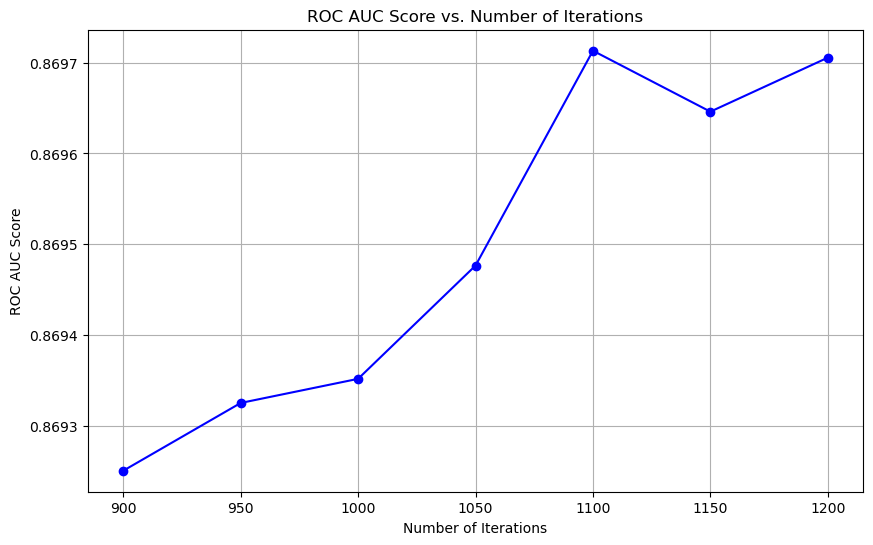

In [141]:
# Plotting code remains the same
# Extract iterations and corresponding ROC AUC scores
iterations_list = list(catboost_scores.keys())
roc_auc_scores = [catboost_scores[n]['roc_auc'] for n in iterations_list]

# Plot iterations vs ROC AUC scores
plt.figure(figsize=(10, 6))
plt.plot(iterations_list, roc_auc_scores, marker='o', linestyle='-', color='b')
plt.title('ROC AUC Score vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('ROC AUC Score')
plt.grid(True)
plt.xticks(iterations_list)  # Ensures that all iteration values are shown as ticks
plt.show()

# XGBoost with increasing iterations

In [146]:
xgb_scores = {}

# Loop over your range of n_estimators for XGBoost
for n_est in range(1200, 1401, 50):
    # Initialize XGBClassifier with current n_estimators
    clf = XGBClassifier(
        n_estimators=n_est,
        max_depth=12,
        learning_rate=0.05,
        subsample=1.0,
        min_child_weight=3,
        gamma=0,
        colsample_bytree=0.6,
        colsample_bylevel=0.8,
        eval_metric='logloss'
    )

    # Fit the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_valid)
    y_prob = clf.predict_proba(X_valid)[:, 1]  # probabilities for ROC AUC

    # Calculate scores
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_prob)

    # Add scores to dictionary with (n_estimators) as key
    xgb_scores[(n_est)] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

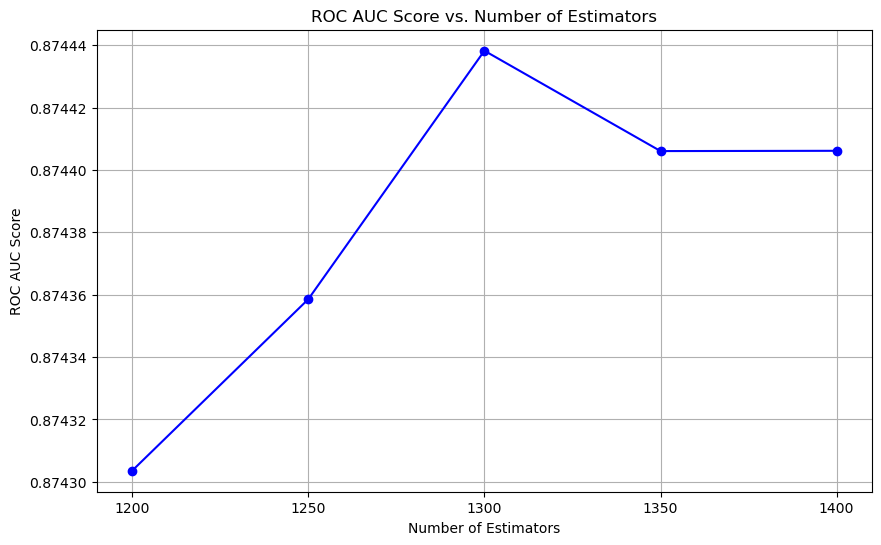

In [147]:
# Plotting code remains the same
# Extract iterations and corresponding ROC AUC scores
iterations_list = list(xgb_scores.keys())
roc_auc_scores = [xgb_scores[n]['roc_auc'] for n in iterations_list]

# Plot iterations vs ROC AUC scores
plt.figure(figsize=(10, 6))
plt.plot(iterations_list, roc_auc_scores, marker='o', linestyle='-', color='b')
plt.title('ROC AUC Score vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('ROC AUC Score')
plt.grid(True)
plt.xticks(iterations_list)  # Ensures that all iteration values are shown as ticks
plt.show()

# 5. Ensemble Training

## Chosen Models

In [173]:
# Create instance of models

random_forest = RandomForestClassifier(
    n_estimators=1100,
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    max_features='sqrt',
    bootstrap=False,
    n_jobs=-1
  )

catboost = CatBoostClassifier(
    iterations=1100,
    learning_rate=0.1,
    l2_leaf_reg=9,
    grow_policy='Lossguide',
    depth=8,
    border_count=254,
    auto_class_weights='Balanced',
    silent=True
    )

xgboost = XGBClassifier(
    n_estimators=1300,
    max_depth=12,
    learning_rate=0.05,
    subsample=1.0,
    min_child_weight=3,
    gamma=0,
    colsample_bytree=0.6,
    colsample_bylevel=0.8,
    eval_metric='logloss'
    )

lightgbm = LGBMClassifier(
    num_leaves=100,
    n_estimators=1000,
    min_data_in_leaf=300,
    max_depth=7,
    learning_rate=0.1,
    lambda_l1=0.1,
    lambda_l2=0.5,
    feature_fraction=0.6,
    bagging_fraction=0.6
)

In [149]:
# Define our base models

random_forest.fit(X_train,y_train)

catboost.fit(X_train,y_train)

xgboost.fit(X_train,y_train)

lightgbm.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5


LGBMClassifier(bagging_fraction=0.6, feature_fraction=0.6, lambda_l1=0.1,
               lambda_l2=0.5, max_depth=7, min_data_in_leaf=300,
               n_estimators=1000, num_leaves=100)

## Neural Network Stacking Classifier

In [175]:
# Define the neural network structure for stacking
def create_model():
    nn_model = Sequential()
    nn_model.add(Dense(64, input_dim=4, activation='relu'))
    nn_model.add(Dropout(0.5))
    nn_model.add(Dense(32, activation='relu'))
    nn_model.add(Dropout(0.5))
    nn_model.add(Dense(1, activation='sigmoid'))
    nn_model.compile(loss='binary_crossentropy', optimizer='adam')
    return nn_model

# early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Wrap the Keras model for use in the Scikeras Classifier
neural_net = KerasClassifier(model=create_model, epochs=50, batch_size=32, verbose=1)

# Create the stacking ensemble
stack = StackingClassifier(estimators=[('Random Forest', random_forest), ('CatBoost', catboost), ('XGBoost', xgboost), ('LightGBM', lightgbm)], final_estimator=neural_net)

## Create Submission with Predictions

In [176]:
stack.fit(X, y)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignor

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(bootstrap=False,
                                                       criterion='entropy',
                                                       n_estimators=1100,
                                                       n_jobs=-1)),
                               ('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x000001FDE43ACF10>),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=0.8,
                                              colsample_bynode=None,
                                              colsample_bytree=0.6,
                                              early_...
                                              n_estimators=1300, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('LightGBM',
                                LGBMClassifier(bagging_fraction=0.6,
                                               feature_fraction=0.6,
                                               lambda_l1=0.1, lambda_l2=0.5,
                                               max_depth=7,
                                               min_data_in_leaf=300,
                                               n_estimators=1000,
                                               num_leaves=100))],
                   final_estimator=KerasClassifier(batch_size=32, epochs=50, model=<function create_model at 0x000001FDF1F20820>))

In [177]:
model_preds = stack.predict_proba(test.drop('id',axis=1))[:,1]
results = pd.DataFrame([test['id'],model_preds]).transpose()
results.columns = [['id','smoking']]
results['id'] = results['id'].astype('int')
print(results.head())
# Get the current timestamp
current_time = datetime.now()

# Format the timestamp as 'day-hour-minute'
timestamp = current_time.strftime("%d-%H-%M")

# Create the filename
filename = 'results-' + timestamp + '.csv'
results.to_csv(filename,index=False)

3318/3318 [==============================] - 9s 3ms/step
       id   smoking
0  159256  0.632336
1  159257  0.226367
2  159258  0.382909
3  159259  0.014283
4  159260  0.670281
